In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf

In [26]:
df=pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [28]:
df=df.rename({'R&D Spend':'RDS','Marketing Spend':'MarketingSpend'},axis=1)
df.head()

,RDS,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [29]:
df.corr()

,RDS,Administration,MarketingSpend,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


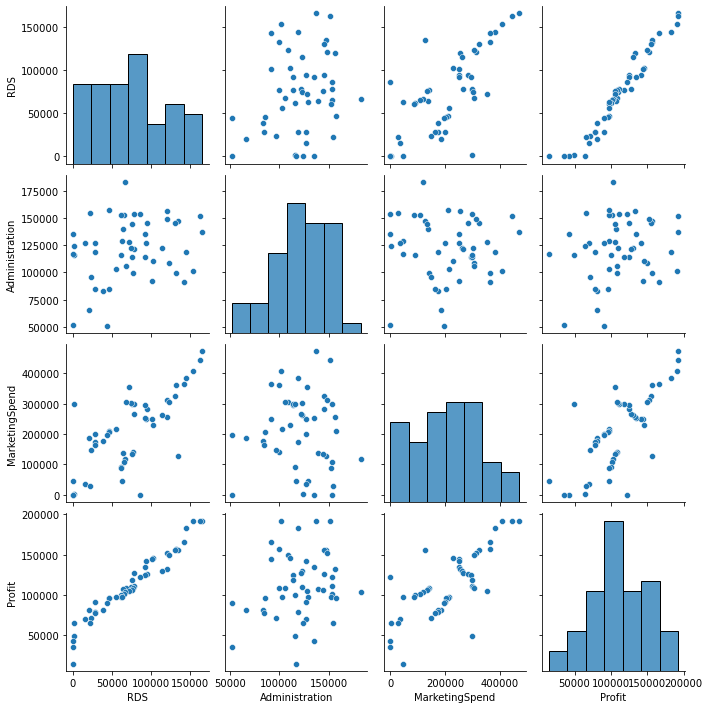

In [30]:
sns.pairplot(df)

In [45]:
df=pd.get_dummies(df, columns=['State'])
df.head()

,RDS,Administration,MarketingSpend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [46]:
df=df.rename({'State_New York':'State_NewYork'},axis=1)
df.head()

,RDS,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [48]:
model=smf.ols("Profit~RDS+Administration+MarketingSpend+State_California+State_Florida+State_NewYork",data=df).fit()

In [49]:
model.params

Intercept           37633.233317
RDS                     0.806023
Administration         -0.027004
MarketingSpend          0.026980
State_California    12492.110514
State_Florida       12690.899307
State_NewYork       12450.223495
dtype: float64

In [62]:
np.round(model.pvalues,6)

Intercept           0.000000
RDS                 0.000000
Administration      0.607737
MarketingSpend      0.122677
State_California    0.000007
State_Florida       0.000030
State_NewYork       0.000009
dtype: float64

In [70]:
model.rsquared,model.rsquared_adj

(0.9507524843355148, 0.945156175737278)

In [52]:
model_A=smf.ols("Profit~Administration",data=df).fit()

In [57]:
model_A.pvalues

Intercept         0.003824
Administration    0.162217
dtype: float64

In [55]:
model_M=smf.ols("Profit~MarketingSpend",data=df).fit()

In [58]:
model_M.pvalues

Intercept         4.294735e-10
MarketingSpend    4.381073e-10
dtype: float64

In [59]:
model_M_A=smf.ols("Profit~MarketingSpend+Administration",data=df).fit()

In [61]:
np.round(model_M_A.pvalues,6)

Intercept         0.258934
MarketingSpend    0.000000
Administration    0.017292
dtype: float64

In [65]:
model_1=smf.ols("Profit~RDS+MarketingSpend+State_California+State_Florida+State_NewYork",data=df).fit()

In [66]:
model_1.pvalues

Intercept           5.420201e-21
RDS                 6.509785e-23
MarketingSpend      7.204640e-02
State_California    2.004515e-07
State_Florida       1.970877e-06
State_NewYork       4.720949e-07
dtype: float64

In [72]:
model_1.rsquared,model_1.rsquared_adj

(0.950453304509085, 0.9460491537987815)

In [73]:
rsq_r=smf.ols("RDS~Administration+MarketingSpend",data=df).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Administration~RDS+MarketingSpend",data=df).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MarketingSpend~RDS+Administration",data=df).fit().rsquared
vif_m=1/(1-rsq_m)

In [75]:
Vif_df=pd.DataFrame({'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]})
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'Normal Q-Q plot for residual')

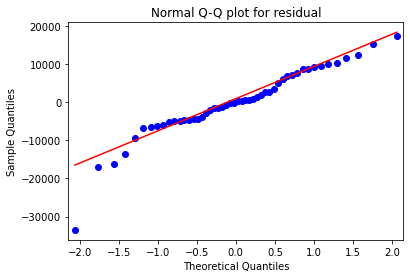

In [76]:
import statsmodels.api as sm
qq_plot=sm.qqplot(model.resid,line='q') #45 degree line
plt.title("Normal Q-Q plot for residual")

In [83]:
list(np.where(model.resid<(-20000)))

[array([49], dtype=int64)]

In [84]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

Text(0, 0.5, 'Standardized residual values')

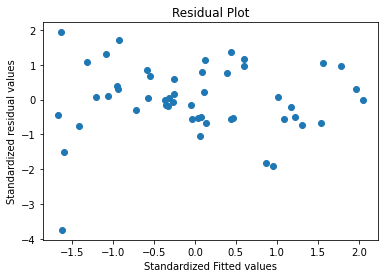

In [85]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [86]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

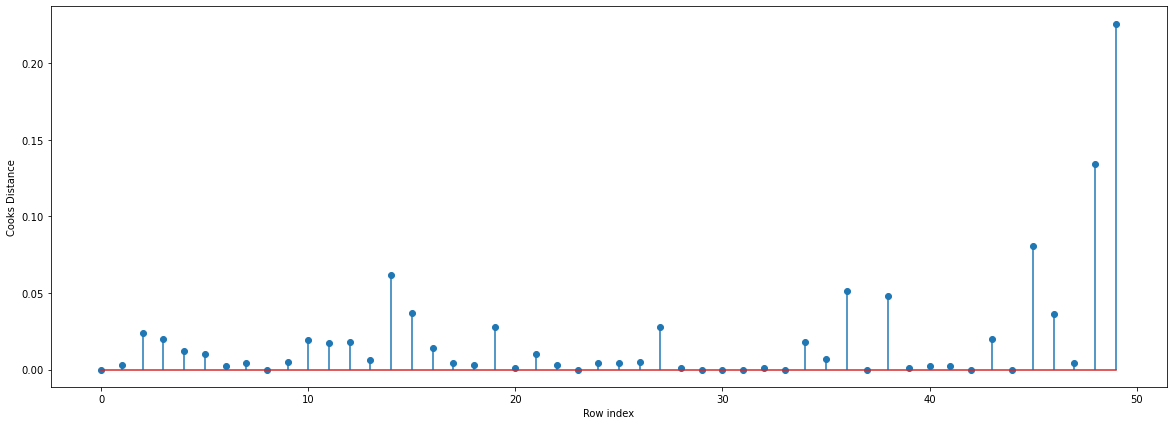

In [87]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [89]:
rsq_table=pd.DataFrame({'M-name':['Model'],'Rsquared':[model_1.rsquared]})
rsq_table


,M-name,Rsquared
0,Model,0.950453
